# Recomendation using Collaborative Filtering

is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

we try to use embedding and also build neural network for a model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tourism_rating.csv to tourism_rating.csv


## upload data

In [3]:
tourism = pd.read_csv('tourism_rating.csv')

In [4]:
tourism.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [5]:
tourism.shape

(10000, 3)

In [6]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


## split data for training 80% and for test 20%

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tourism, test_size=0.2, random_state=42)

In [8]:
train.head()

,User_Id,Place_Id,Place_Ratings
9254,278,262,3
1561,49,251,2
1670,52,52,2
6087,183,385,1
6669,200,258,5


In [9]:
test.head()

,User_Id,Place_Id,Place_Ratings
6252,188,207,3
4684,142,268,2
1731,54,103,3
4742,144,119,3
4521,138,288,5


In [10]:
n_users = len(tourism.User_Id.unique())
n_users

300

In [11]:
n_tourisms = len(tourism.Place_Id.unique())
n_tourisms

437

## Neural Networks

Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems

In [35]:

# creating book embedding path
tourism_input = Input(shape=[1], name="Tourism-Input")
tourism_embedding = Embedding(n_tourisms+1, 5, name="Tourism-Embedding")(tourism_input)
tourism_vec = Flatten(name="Flatten-Tourism")(tourism_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([tourism_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(64, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model = Model([user_input, tourism_input], out)
model.compile('adam', 'mean_squared_error')

In [36]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Tourism-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Tourism-Embedding (Embedding)  (None, 1, 5)         2190        ['Tourism-Input[0][0]']          
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 5)         1505        ['User-Input[0][0]']             
                                                                                            

In [37]:
#model2.summary()

In [38]:

#from keras.models import load_model

#if os.path.exists('regression_model2.h5'):
    #model2 = load_model('regression_model2.h5')
#else:
history = model.fit([train.User_Id, train.Place_Id], train.Place_Ratings, epochs=20, verbose=1)
    #model2.save('regression_model2.h5')


Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 3.0385
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 1.8627
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 1.8130
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 1.7873
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 1.7768
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 1.7654
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 1.7588
Epoch 8/20
250/250 [==============================] - 1s 2ms/step - loss: 1.7496
Epoch 9/20
250/250 [==============================] - 1s 2ms/step - loss: 1.7438
Epoch 10/20
250/250 [==============================] - 1s 2ms/step - loss: 1.7081
Epoch 11/20
250/250 [==============================] - 1s 3ms/step - loss: 1.6637
Epoch 12/20
250/250 [==============================] - 1s 3ms/step - loss: 1.6219
Epoch 13/20
250/250 [====

Text(0, 0.5, 'Training Error')

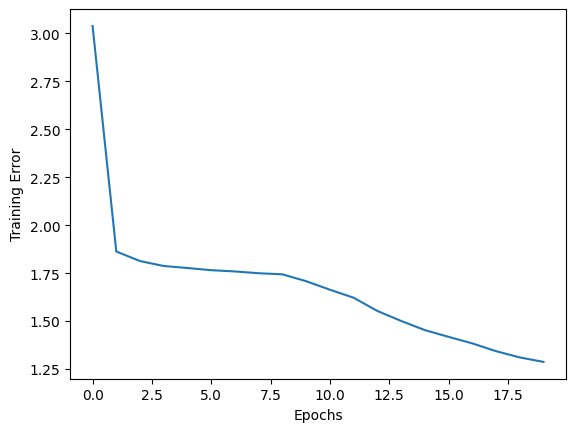

In [39]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [40]:
model.evaluate([test.User_Id, test.Place_Id], test.Place_Ratings)

63/63 [==============================] - 0s 2ms/step - loss: 2.4842


2.484179735183716

In [41]:
model.save('recommendation_rating_model.h5')

In [42]:
tf.saved_model.save(model, "export")

loaded = tf.saved_model.load("export")

converter = tf.lite.TFLiteConverter.from_saved_model("export")
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

57268

In [43]:
id_place = range(1,20)

In [44]:
# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(tourism.Place_Id)))
tourism_data[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
id_user = 3

In [46]:
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Predict

In [47]:
predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

14/14 [==============================] - 0s 2ms/step


array([299, 248, 266, 156, 356,  13, 278, 397,  31, 143])

In [48]:
# print predicted scores
predictions[recommended_tourism_ids]

array([4.5785813, 4.482707 , 4.400335 , 4.324307 , 4.3192954, 4.296976 ,
       4.254598 , 4.2332997, 4.19333  , 4.178848 ], dtype=float32)